In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
collision_color = 'burlywood'
momentum_color = 'darkorange'
periodic_color = 'chocolate'
couette_color = 'saddlebrown'
leesed_color = 'darkgoldenrod'

In [320]:
collision_color = 'dimgray'
momentum_color = 'darkgray'
periodic_color = 'silver'
couette_color = 'lightgray'
leesed_color = 'whitesmoke'

In [324]:
collision_color = 'darkcyan'
momentum_color = 'cadetblue'
periodic_color = 'powderblue'
couette_color = 'skyblue'
leesed_color = 'paleturquoise'

In [3]:
per_sat = 'indianred'
cou_sat = 'slateblue'
leesed_sat = 'purple'

In [4]:
color_baseline = 'coral'
color1 = 'red'
color2 = 'crimson'
color3 = 'firebrick'
color4 = 'darkred'

In [5]:
from matplotlib.colors import to_rgba
def desaturate_color(color, factor=0.5):
    """
    Desaturate a given color by blending it with white.
    
    Parameters:
    - color: The original color as a string or RGB tuple.
    - factor: The factor by which to desaturate the color (0 = original color, 1 = white).
    
    Returns:
    - The desaturated color as an RGB tuple.
    """
    white = np.array([1, 1, 1, 1])
    color = np.array(to_rgba(color))
    desaturated_color = color + (white - color) * factor
    return desaturated_color

In [325]:
#desaturate color
collision_color = desaturate_color(collision_color)
momentum_color = desaturate_color(momentum_color)
periodic_color = desaturate_color(periodic_color)
couette_color = desaturate_color(couette_color)
leesed_color = desaturate_color(leesed_color)

In [6]:
def get_data(file, name):
    f = file[file['function'] == name]
    iops = f['iops'].to_numpy()
    flops = f['flops'].to_numpy()
    bytes_read = f['bytes_read'].to_numpy()
    bytes_write = f['bytes_write'].to_numpy()
    cycles = f['cycles'].to_numpy()
    dir = f['DIRECTION_SIZE'].to_numpy()
    return iops, flops, bytes_read, bytes_write, cycles, dir


In [7]:

#FOR THE STACKPLOT/BOTTLENECK
def plot_stack(grid_sizes, collision_cycles, momentum_cycles, stream_cycles, name):
    # Convert grid sizes to a numerical format for the x-axis
    x = np.arange(len(grid_sizes))

    # Stack plot data
    y = np.vstack([collision_cycles, momentum_cycles, stream_cycles])

    # Plotting
    fig, ax = plt.subplots()
    ax.stackplot(x, y, labels=['Collision', 'Momentum', name])

    ax.text(3, 25, 'Collision', fontsize=10, color='black', va='center')
    ax.text(4, 50, 'Momentum', fontsize=10, color='black', va='center')
    ax.text(3, 85, name, fontsize=10, color='black', va='center')
    ax.spines['left'].set_position('zero')

    # Customizing the plot
    ax.set_xticks(x)
    ax.set_xticklabels(grid_sizes)
    ax.set_xlabel('Grid Size')
    ax.set_ylabel('Percentage of Total Cycles')
    ax.set_title('Cycles for Different Grid Sizes')
    #ax.legend(loc='upper left')
    #ax.set_yscale('log')

    # Display the plot
    plt.show()


In [8]:
csv_file_path = "TimingData.csv"
df = pd.read_csv(csv_file_path)

In [9]:
#cost function
def cost(flops, iops):
    return flops + iops

In [10]:
############ BASELINE ##############################################################
#variables
cb_iops, cb_flops, cb_bytes_read, cb_bytes_write, cb_cycles, cb_dir = get_data(df, 'Collision Baseline')
mb_iops, mb_flops, mb_bytes_read, mb_bytes_write, mb_cycles, mb_dir = get_data(df, 'Momentum Baseline')
pb_iops, pb_flops, pb_bytes_read, pb_bytes_write, pb_cycles, pb_dir = get_data(df, 'Stream Periodic Baseline')
cob_iops, cob_flops, cob_bytes_read, cob_bytes_write, cob_cycles, cob_dir = get_data(df, 'Stream Couette Baseline')
lb_iops, lb_flops, lb_bytes_read, lb_bytes_write, lb_cycles, lb_dir = get_data(df, 'Stream Lees Edwards Baseline')

#total iops - periodic, couette, lees
bp_iops = cb_iops + mb_iops + pb_iops
bc_iops = cb_iops + mb_iops + cob_iops
bl_iops = cb_iops + mb_iops + lb_iops

#total flops - periodic, couette, lees
bp_flops = cb_flops + mb_flops + pb_flops
bc_flops = cb_flops + mb_flops + cob_flops
bl_flops = cb_flops + mb_flops + lb_flops

#total flops - periodic, couette, lees
bp_cycles = cb_cycles + mb_cycles + pb_cycles
bc_cycles = cb_cycles + mb_cycles + cob_cycles
bl_cycles = cb_cycles + mb_cycles + lb_cycles


#percentage
cpb_percentage = cb_cycles*100/bp_cycles
mpb_percentage = mb_cycles*100/bp_cycles
spb_percentage = pb_cycles*100/bp_cycles

ccb_percentage = cb_cycles*100/bc_cycles
mcb_percentage = mb_cycles*100/bc_cycles
scb_percentage = cob_cycles*100/bc_cycles

clb_percentage = cb_cycles*100/bl_cycles
mlb_percentage = mb_cycles*100/bl_cycles
slb_percentage = lb_cycles*100/bl_cycles

#performance
perflops_performance = bp_flops/bp_cycles
couflops_performance = bc_flops/bc_cycles
leesflops_performance = bl_flops/bl_cycles

periops_performance = bp_iops/bp_cycles
couiops_performance = bc_iops/bc_cycles
leesiops_performance = bl_iops/bl_cycles

pperf = cost(bp_flops, bp_iops)/bp_cycles
cperf = cost(bc_flops, bc_iops)/bc_cycles
lperf = cost(bl_flops, bl_iops)/bl_cycles






In [11]:
############ Optimization 1 ##############################################################
#variables
# Fetching data
c1_iops, c1_flops, c1_bytes_read, c1_bytes_write, c1_cycles, c1_dir = get_data(df, 'Collision 1')
m1_iops, m1_flops, m1_bytes_read, m1_bytes_write, m1_cycles, m1_dir = get_data(df, 'Momentum 1')
p1_iops, p1_flops, p1_bytes_read, p1_bytes_write, p1_cycles, p1_dir = get_data(df, 'Periodic 1')
co1_iops, co1_flops, co1_bytes_read, co1_bytes_write, co1_cycles, co1_dir = get_data(df, 'Couette 1')
l1_iops, l1_flops, l1_bytes_read, l1_bytes_write, l1_cycles, l1_dir = get_data(df, 'Lees Edwards 1')

# Total iops - periodic, couette, lees
tp1_iops = c1_iops + m1_iops + p1_iops
tc1_iops = c1_iops + m1_iops + co1_iops
tl1_iops = c1_iops + m1_iops + l1_iops

# Total flops - periodic, couette, lees
tp1_flops = c1_flops + m1_flops + p1_flops
tc1_flops = c1_flops + m1_flops + co1_flops
tl1_flops = c1_flops + m1_flops + l1_flops

# Total cycles - periodic, couette, lees
tp1_cycles = c1_cycles + m1_cycles + p1_cycles
tc1_cycles = c1_cycles + m1_cycles + co1_cycles
tl1_cycles = c1_cycles + m1_cycles + l1_cycles

#percentage
cp1_percentage = c1_cycles*100/tp1_cycles
mp1_percentage = m1_cycles*100/tp1_cycles
sp1_percentage = p1_cycles*100/tp1_cycles

cc1_percentage = c1_cycles*100/tc1_cycles
mc1_percentage = m1_cycles*100/tc1_cycles
sc1_percentage = co1_cycles*100/tc1_cycles

cl1_percentage = c1_cycles*100/tl1_cycles
ml1_percentage = m1_cycles*100/tl1_cycles
sl1_percentage = l1_cycles*100/tl1_cycles

#performance
perflops_performance1 = tp1_flops/tp1_cycles
couflops_performance1 = tc1_flops/tc1_cycles
leesflops_performance1 = tl1_flops/tl1_cycles

periops_performance1 = tp1_iops/tp1_cycles
couiops_performance1 = tc1_iops/tc1_cycles
leesiops_performance1 = tl1_iops/tl1_cycles

pperf1 = cost(tp1_flops, tp1_iops)/tp1_cycles
cperf1 = cost(tc1_flops, tc1_iops)/tc1_cycles
lperf1 = cost(tl1_flops, tl1_iops)/tl1_cycles





In [12]:
############ Optimization 2 ##############################################################
# Fetching data
c2_iops, c2_flops, c2_bytes_read, c2_bytes_write, c2_cycles, c2_dir = get_data(df, 'Collision 2')
m2_iops, m2_flops, m2_bytes_read, m2_bytes_write, m2_cycles, m2_dir = get_data(df, 'Momentum 2')
p2_iops, p2_flops, p2_bytes_read, p2_bytes_write, p2_cycles, p2_dir = get_data(df, 'Periodic 2')
co2_iops, co2_flops, co2_bytes_read, co2_bytes_write, co2_cycles, co2_dir = get_data(df, 'Couette 2')
l2_iops, l2_flops, l2_bytes_read, l2_bytes_write, l2_cycles, l2_dir = get_data(df, 'Lees Edwards 2')

# Total iops - periodic, couette, lees
tp2_iops = c2_iops + m2_iops + p2_iops
tc2_iops = c2_iops + m2_iops + co2_iops
tl2_iops = c2_iops + m2_iops + l2_iops

# Total flops - periodic, couette, lees
tp2_flops = c2_flops + m2_flops + p2_flops
tc2_flops = c2_flops + m2_flops + co2_flops
tl2_flops = c2_flops + m2_flops + l2_flops

# Total cycles - periodic, couette, lees
tp2_cycles = c2_cycles + m2_cycles + p2_cycles
tc2_cycles = c2_cycles + m2_cycles + co2_cycles
tl2_cycles = c2_cycles + m2_cycles + l2_cycles


#percentage
cp2_percentage = c2_cycles*100/tp2_cycles
mp2_percentage = m2_cycles*100/tp2_cycles
sp2_percentage = p2_cycles*100/tp2_cycles

cc2_percentage = c2_cycles*100/tc2_cycles
mc2_percentage = m2_cycles*100/tc2_cycles
sc2_percentage = co2_cycles*100/tc2_cycles

cl2_percentage = c2_cycles*100/tl2_cycles
ml2_percentage = m2_cycles*100/tl2_cycles
sl2_percentage = l2_cycles*100/tl2_cycles

#performance
perflops_performance2 = tp2_flops/tp2_cycles
couflops_performance2 = tc2_flops/tc2_cycles
leesflops_performance2 = tl2_flops/tl2_cycles

periops_performance2 = tp2_iops/tp2_cycles
couiops_performance2 = tc2_iops/tc2_cycles
leesiops_performance2 = tl2_iops/tl2_cycles

pperf2 = cost(tp2_flops, tp2_iops)/tp2_cycles
cperf2 = cost(tc2_flops, tc2_iops)/tc2_cycles
lperf2 = cost(tl2_flops, tl2_iops)/tl2_cycles




In [13]:
############ Optimization 3 ##############################################################
# Fetching data
c3_iops, c3_flops, c3_bytes_read, c3_bytes_write, c3_cycles, c3_dir = get_data(df, 'Collision 3')
m3_iops, m3_flops, m3_bytes_read, m3_bytes_write, m3_cycles, m3_dir = get_data(df, 'Momentum 3')
p3_iops, p3_flops, p3_bytes_read, p3_bytes_write, p3_cycles, p3_dir = get_data(df, 'Periodic 3')
co3_iops, co3_flops, co3_bytes_read, co3_bytes_write, co3_cycles, co3_dir = get_data(df, 'Couette 3')
l3_iops, l3_flops, l3_bytes_read, l3_bytes_write, l3_cycles, l3_dir = get_data(df, 'Lees Edwards 3')

# Total iops - periodic, couette, lees
tp3_iops = c3_iops + m3_iops + p3_iops
tc3_iops = c3_iops + m3_iops + co3_iops
tl3_iops = c3_iops + m3_iops + l3_iops

# Total flops - periodic, couette, lees
tp3_flops = c3_flops + m3_flops + p3_flops
tc3_flops = c3_flops + m3_flops + co3_flops
tl3_flops = c3_flops + m3_flops + l3_flops

# Total cycles - periodic, couette, lees
tp3_cycles = c3_cycles + m3_cycles + p3_cycles
tc3_cycles = c3_cycles + m3_cycles + co3_cycles
tl3_cycles = c3_cycles + m3_cycles + l3_cycles

#percentage
cp3_percentage = c3_cycles*100/tp3_cycles
mp3_percentage = m3_cycles*100/tp3_cycles
sp3_percentage = p3_cycles*100/tp3_cycles

cc3_percentage = c3_cycles*100/tc3_cycles
mc3_percentage = m3_cycles*100/tc3_cycles
sc3_percentage = co3_cycles*100/tc3_cycles

cl3_percentage = c3_cycles*100/tl3_cycles
ml3_percentage = m3_cycles*100/tl3_cycles
sl3_percentage = l3_cycles*100/tl3_cycles

#performance
perflops_performance3 = tp3_flops/tp3_cycles
couflops_performance3 = tc3_flops/tc3_cycles
leesflops_performance3 = tl3_flops/tl3_cycles

periops_performance3 = tp3_iops/tp3_cycles
couiops_performance3 = tc3_iops/tc3_cycles
leesiops_performance3 = tl3_iops/tl3_cycles

pperf3 = cost(tp3_flops, tp3_iops)/tp3_cycles
cperf3 = cost(tc3_flops, tc3_iops)/tc3_cycles
lperf3 = cost(tl3_flops, tl3_iops)/tl3_cycles



In [14]:
############ Optimization 4 ##############################################################
# Fetching data
c4_iops, c4_flops, c4_bytes_read, c4_bytes_write, c4_cycles, c4_dir = get_data(df, 'Collision 4')
m4_iops, m4_flops, m4_bytes_read, m4_bytes_write, m4_cycles, m4_dir = get_data(df, 'Momentum 4')
p4_iops, p4_flops, p4_bytes_read, p4_bytes_write, p4_cycles, p4_dir = get_data(df, 'Periodic 4')
co4_iops, co4_flops, co4_bytes_read, co4_bytes_write, co4_cycles, co4_dir = get_data(df, 'Couette 4')
l4_iops, l4_flops, l4_bytes_read, l4_bytes_write, l4_cycles, l4_dir = get_data(df, 'Lees Edwards 4')

# Total iops - periodic, couette, lees
tp4_iops = c4_iops + m4_iops + p3_iops
tc4_iops = c4_iops + m4_iops + co4_iops
tl4_iops = c4_iops + m4_iops + l4_iops

# Total flops - periodic, couette, lees
tp4_flops = c4_flops + m4_flops + p3_flops
tc4_flops = c4_flops + m4_flops + co4_flops
tl4_flops = c4_flops + m4_flops + l4_flops

# Total cycles - periodic, couette, lees
tp4_cycles = c4_cycles + m4_cycles + p3_cycles
tc4_cycles = c4_cycles + m4_cycles + co4_cycles
tl4_cycles = c4_cycles + m4_cycles + l4_cycles


#percentage
cp4_percentage = c4_cycles*100/tp4_cycles
mp4_percentage = m4_cycles*100/tp4_cycles
sp4_percentage = p3_cycles*100/tp4_cycles

cc4_percentage = c4_cycles*100/tc4_cycles
mc4_percentage = m4_cycles*100/tc4_cycles
sc4_percentage = co4_cycles*100/tc4_cycles

cl4_percentage = c4_cycles*100/tl4_cycles
ml4_percentage = m4_cycles*100/tl4_cycles
sl4_percentage = l4_cycles*100/tl4_cycles


#performance
perflops_performance4 = tp4_flops/tp4_cycles
couflops_performance4 = tc4_flops/tc4_cycles
leesflops_performance4 = tl4_flops/tl4_cycles

periops_performance4 = tp4_iops/tp4_cycles
couiops_performance4 = tc4_iops/tc4_cycles
leesiops_performance4 = tl4_iops/tl4_cycles

pperf4 = cost(tp4_flops, tp4_iops)/tp4_cycles
cperf4 = cost(tc4_flops, tc4_iops)/tc4_cycles
lperf4 = cost(tl4_flops, tl4_iops)/tl4_cycles




In [15]:
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$"]

In [ ]:
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$"]
grid_sizes =  [4, 8, 16, 32, 64, 128]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, cperf, marker='o', color=color_baseline, linestyle='-', label="Couette b")
#ax.plot(grid_sizes, cperf, marker='o', color=color3, linestyle='-', label="Couette BC")
#ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="LeesEdwards BC")

ax.plot(grid_sizes, cperf1, marker='o', color=color1, linestyle='-', label="Couette 1")
ax.plot(grid_sizes, cperf2, marker='o', color=color2, linestyle='-', label="Couette 2")
ax.plot(grid_sizes, cperf3, marker='o', color=color3, linestyle='-', label="Couette 3")
ax.plot(grid_sizes, cperf4, marker='o', color=color4, linestyle='-', label="Couette 4")

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
#plt.text(8, pperf[1], 'periodic', color=color1, fontsize=10, rotation=0, va='center')
#plt.text(17, cperf[2], 'couette', color=color3, fontsize=10, rotation=0, va='center')
#plt.text(27, lperf[3], 'lees-edwards', color=color4, fontsize=10, rotation=0, va='center')


# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz Max Freq: 4.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

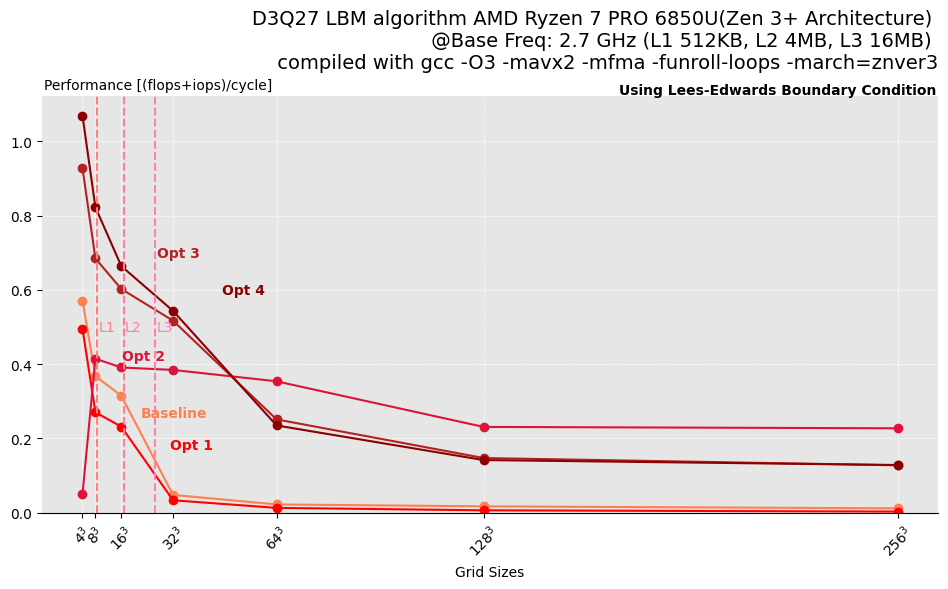

In [59]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, lperf, marker='o', color=color_baseline, linestyle='-', label="LE b")
#ax.plot(grid_sizes, cperf, marker='o', color=color3, linestyle='-', label="Couette BC")
#ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="LeesEdwards BC")

ax.plot(grid_sizes, lperf1, marker='o', color=color1, linestyle='-', label="LE 1")
ax.plot(grid_sizes, lperf2, marker='o', color=color2, linestyle='-', label="LE 2")
ax.plot(grid_sizes, lperf3, marker='o', color=color3, linestyle='-', label="LE 3")
ax.plot(grid_sizes, lperf4, marker='o', color=color4, linestyle='-', label="LE 4")

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(22, 0.25, 'Baseline', color=color_baseline, fontsize=10, rotation=0, va='bottom', fontweight='bold')
plt.text(31, 0.2, 'Opt 1', color=color1, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(16.2, 0.44, 'Opt 2', color=color2, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(27, 0.7, 'Opt 3', color=color3, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(47, 0.6, 'Opt 4', color=color4, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(170, 1.12, 'Using Lees-Edwards Boundary Condition', color='black', fontsize=10, rotation=0, va='bottom', fontweight='bold')

# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
#plt.legend()
fig.savefig("perf_lees.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_lees.png", bbox_inches='tight', pad_inches=0.2)
plt.grid(True)
plt.tight_layout()
plt.show()

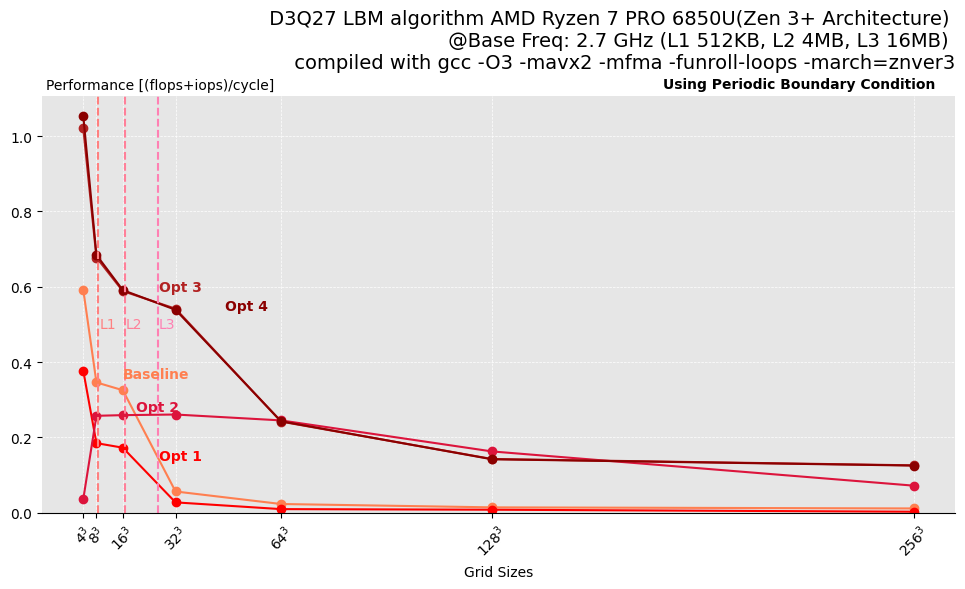

In [60]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, pperf, marker='o', color=color_baseline, linestyle='-', label="LE b")
#ax.plot(grid_sizes, cperf, marker='o', color=color3, linestyle='-', label="Couette BC")
#ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="LeesEdwards BC")

ax.plot(grid_sizes, pperf1, marker='o', color=color1, linestyle='-', label="LE 1")
ax.plot(grid_sizes, pperf2, marker='o', color=color2, linestyle='-', label="LE 2")
ax.plot(grid_sizes, pperf3, marker='o', color=color3, linestyle='-', label="LE 3")
ax.plot(grid_sizes, pperf4, marker='o', color=color4, linestyle='-', label="LE 4")

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(16, 0.35, 'Baseline', color=color_baseline, fontsize=10, rotation=0, va='bottom', fontweight='bold')
plt.text(27, 0.17, 'Opt 1', color=color1, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(20, 0.3, 'Opt 2', color=color2, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(27, 0.6, 'Opt 3', color=color3, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(47, 0.55, 'Opt 4', color=color4, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(180, 1.12, 'Using Periodic Boundary Condition', color='black', fontsize=10, rotation=0, va='bottom', fontweight='bold')

# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title(' D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
fig.savefig("perf_periodic.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_periodic.png", bbox_inches='tight', pad_inches=0.2)
# Show plot
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

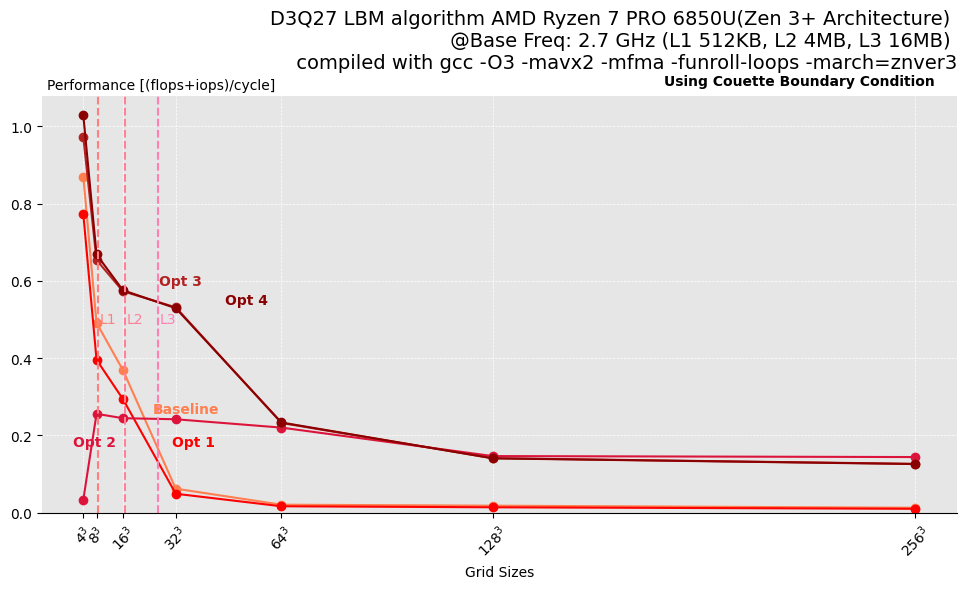

In [61]:


i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, cperf, marker='o', color=color_baseline, linestyle='-', label="LE b")
#ax.plot(grid_sizes, cperf, marker='o', color=color3, linestyle='-', label="Couette BC")
#ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="LeesEdwards BC")

ax.plot(grid_sizes, cperf1, marker='o', color=color1, linestyle='-', label="LE 1")
ax.plot(grid_sizes, cperf2, marker='o', color=color2, linestyle='-', label="LE 2")
ax.plot(grid_sizes, cperf3, marker='o', color=color3, linestyle='-', label="LE 3")
ax.plot(grid_sizes, cperf4, marker='o', color=color4, linestyle='-', label="LE 4")

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(25, 0.25, 'Baseline', color=color_baseline, fontsize=10, rotation=0, va='bottom', fontweight='bold')
plt.text(31, 0.2, 'Opt 1', color=color1, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(1, 0.2, 'Opt 2', color=color2, fontsize=10, rotation=0, va='top', fontweight='bold')
plt.text(27, 0.6, 'Opt 3', color=color3, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(47, 0.55, 'Opt 4', color=color4, fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(180, 1.1, 'Using Couette Boundary Condition', color='black', fontsize=10, rotation=0, va='bottom', fontweight='bold')

# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
#plt.legend()
fig.savefig("perf_couette.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_couette.png", bbox_inches='tight', pad_inches=0.2)
plt.grid(True)
plt.tight_layout()
plt.show()

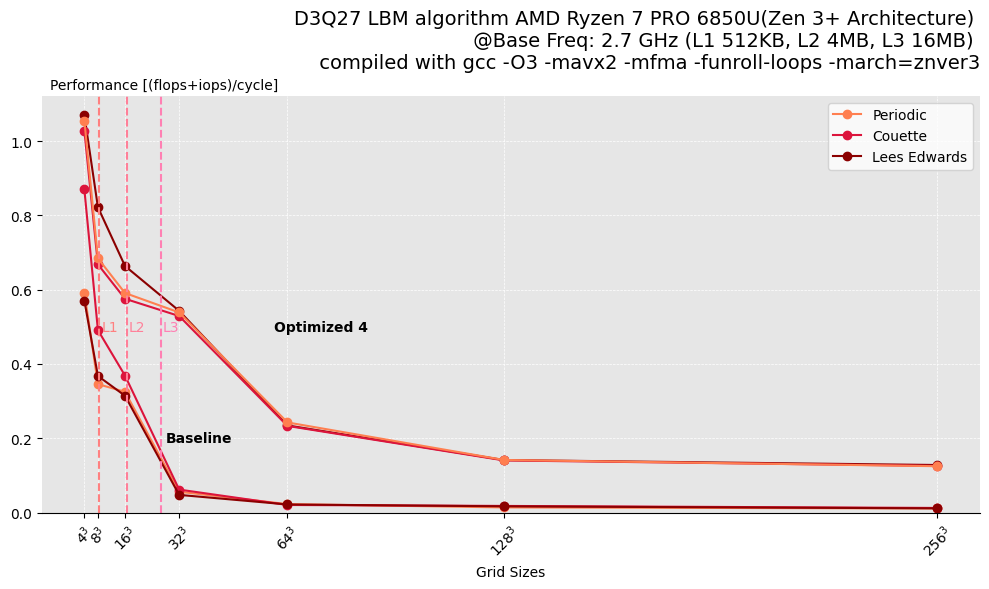

In [62]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, pperf, marker='o', color=color_baseline, linestyle='-', label="Periodic")
ax.plot(grid_sizes, cperf, marker='o', color=color2, linestyle='-', label="Couette")
ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="Lees Edwards")


ax.plot(grid_sizes, lperf4, marker='o', color=color4, linestyle='-')
ax.plot(grid_sizes, cperf4, marker='o', color=color2, linestyle='-')
ax.plot(grid_sizes, pperf4, marker='o', color=color_baseline, linestyle='-')

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(28, 0.2, 'Baseline', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(60, 0.5, 'Optimized 4', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
#plt.text(17, cperf[2], 'couette', color=color3, fontsize=10, rotation=0, va='center')
#plt.text(27, lperf[3], 'lees-edwards', color=color4, fontsize=10, rotation=0, va='center')


# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot

fig.savefig("perf_4.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_4.png", bbox_inches='tight', pad_inches=0.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

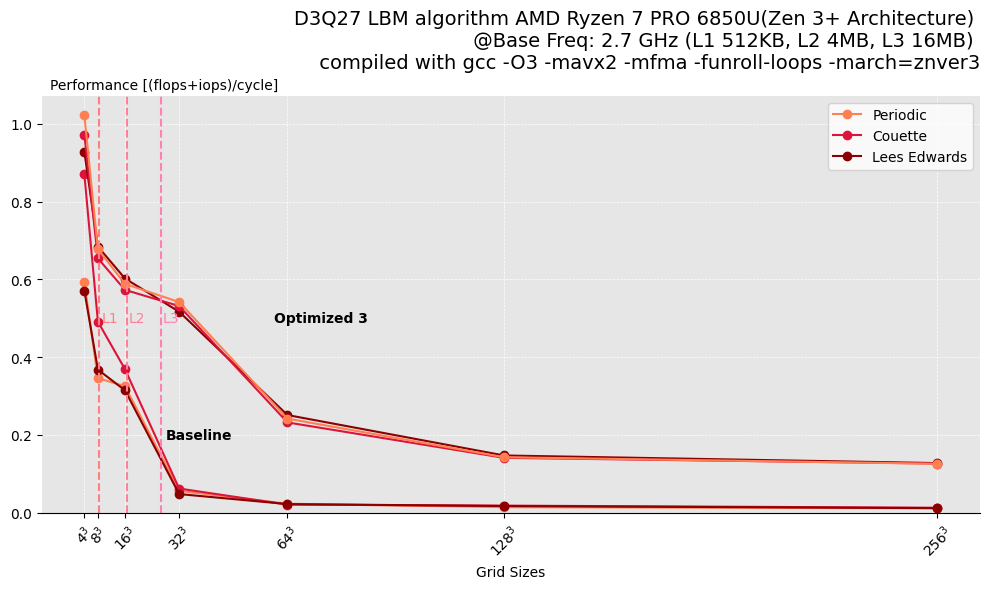

In [63]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, pperf, marker='o', color=color_baseline, linestyle='-', label="Periodic")
ax.plot(grid_sizes, cperf, marker='o', color=color2, linestyle='-', label="Couette")
ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="Lees Edwards")

ax.plot(grid_sizes, lperf3, marker='o', color=color4, linestyle='-')
ax.plot(grid_sizes, cperf3, marker='o', color=color2, linestyle='-')
ax.plot(grid_sizes, pperf3, marker='o', color=color_baseline, linestyle='-')

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(28, 0.2, 'Baseline', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(60, 0.5, 'Optimized 3', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
#plt.text(17, cperf[2], 'couette', color=color3, fontsize=10, rotation=0, va='center')
#plt.text(27, lperf[3], 'lees-edwards', color=color4, fontsize=10, rotation=0, va='center')


# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
fig.savefig("perf_3.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_3.png", bbox_inches='tight', pad_inches=0.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

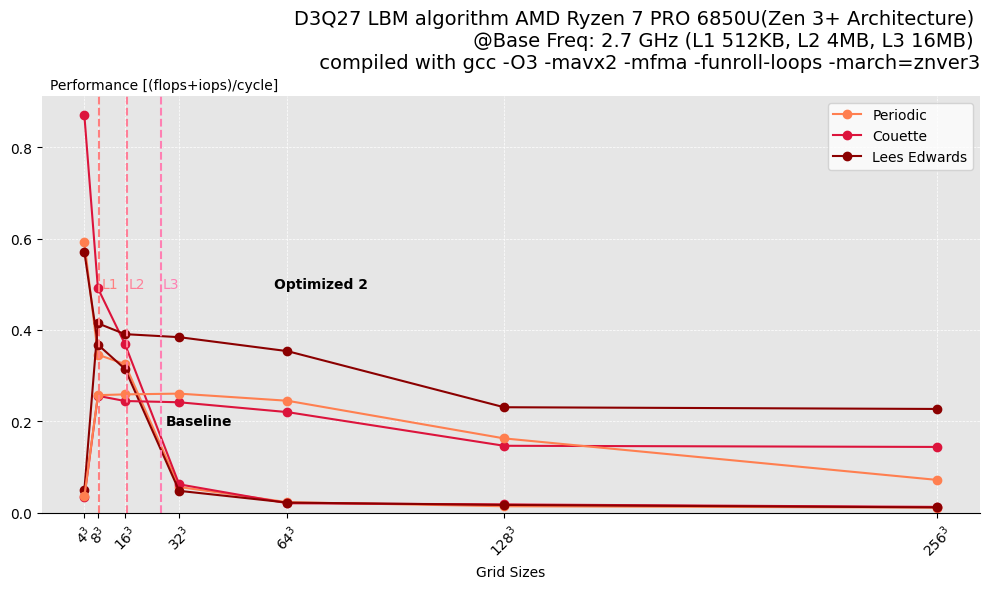

In [64]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, pperf, marker='o', color=color_baseline, linestyle='-', label="Periodic")
ax.plot(grid_sizes, cperf, marker='o', color=color2, linestyle='-', label="Couette")
ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="Lees Edwards")

ax.plot(grid_sizes, lperf2, marker='o', color=color4, linestyle='-')
ax.plot(grid_sizes, cperf2, marker='o', color=color2, linestyle='-')
ax.plot(grid_sizes, pperf2, marker='o', color=color_baseline, linestyle='-')

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(28, 0.2, 'Baseline', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(60, 0.5, 'Optimized 2', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
#plt.text(17, cperf[2], 'couette', color=color3, fontsize=10, rotation=0, va='center')
#plt.text(27, lperf[3], 'lees-edwards', color=color4, fontsize=10, rotation=0, va='center')


# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
fig.savefig("perf_2.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_2.png", bbox_inches='tight', pad_inches=0.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

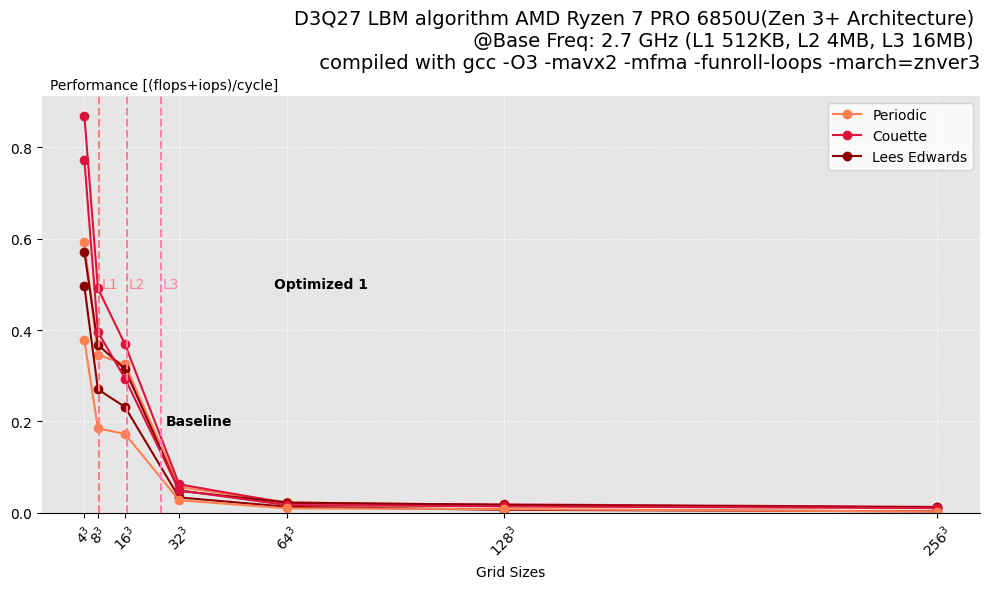

In [65]:

grid_sizes =  [4, 8, 16, 32, 64, 128, 256]
i = 27
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(grid_sizes, pperf, marker='o', color=color_baseline, linestyle='-', label="Periodic")
ax.plot(grid_sizes, cperf, marker='o', color=color2, linestyle='-', label="Couette")
ax.plot(grid_sizes, lperf, marker='o', color=color4, linestyle='-', label="Lees Edwards")

ax.plot(grid_sizes, lperf1, marker='o', color=color4, linestyle='-')
ax.plot(grid_sizes, cperf1, marker='o', color=color2, linestyle='-')
ax.plot(grid_sizes, pperf1, marker='o', color=color_baseline, linestyle='-')

plt.xticks(grid_sizes)  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

ax = plt.gca()
ax.set_ylim(bottom=0)
# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
x = np.arange(len(grid_sizes))
plt.text(28, 0.2, 'Baseline', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
plt.text(60, 0.5, 'Optimized 1', color='black', fontsize=10, rotation=0, va='center', fontweight='bold')
#plt.text(17, cperf[2], 'couette', color=color3, fontsize=10, rotation=0, va='center')
#plt.text(27, lperf[3], 'lees-edwards', color=color4, fontsize=10, rotation=0, va='center')


# Move the bottom spine to the x-axis line position
ax.spines['bottom'].set_position('zero')

#ax.set_facecolor('#999999')
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
if(i==9):
    # (2^(19) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=11.7889007956, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=23.5778015913, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*9+2)*16))   ^(1/3)
    ax.axvline(x=37.4274270491, color=(1,0.5,0.7), linestyle='--')
    plt.text(12, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(24, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(38, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==15):
    # (2^(19) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=10.0793683992, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*15+2)*16))   ^(1/3)   
    ax.axvline(x=20.1587367983, color=(1,0.5,0.6), linestyle='--')
    # (2^(24) /((2*15+2)*16))   ^(1/3)
    ax.axvline(x=32, color=(1,0.5,0.7), linestyle='--')
    plt.text(11, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(21, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(33, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')   
if(i==27):
    # (2^(19) /((2*27+2)*16))   ^(1/3)   
    ax.axvline(x=8.3641273372, color=(1,0.5,0.5), linestyle='--')  
    # (2^(22) /((2*27+2)*16))   ^(1/3)    
    ax.axvline(x=16.7282546744, color=(1,0.5,0.6), linestyle='--')
    #(2^(24) /((2*27+2)*16))   ^(1/3)
    ax.axvline(x=26.5544490677, color=(1,0.5,0.7), linestyle='--')


    plt.text(9, 0.5, 'L1', color=(1, 0.5, 0.5), fontsize=10, rotation=0, va='center')
    plt.text(17, 0.5, 'L2', color=(1, 0.5, 0.6), fontsize=10, rotation=0, va='center')
    plt.text(27, 0.5, 'L3', color=(1, 0.5, 0.7), fontsize=10, rotation=0, va='center')               

# Title and labels


plt.title('D3Q27 LBM algorithm AMD Ryzen 7 PRO 6850U(Zen 3+ Architecture) \n @Base Freq: 2.7 GHz (L1 512KB, L2 4MB, L3 16MB) \n compiled with gcc -O3 -mavx2 -mfma -funroll-loops -march=znver3', loc='right', pad = 20, fontdict={'fontsize': 14, 'fontname': 'Calibri', 'family': 'sans-serif'}, color='black')
plt.xlabel('Grid Sizes', color='black')

# Adding y-axis label as horizontal text on the top
#plt.text(0.5, 1.05, 'Performance (Cost/Cycles)', ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
plt.ylabel('Performance [(flops+iops)/cycle]', rotation=0)
ax.yaxis.set_label_coords(0.13, 1.01)
# Customize x-axis labels
plt.xticks(grid_sizes, color='black')  # Set the x-ticks to be the grid sizes
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Customize y-axis labels
plt.yticks(color='black')
ax.set_facecolor((0.9,0.9,0.9))
#label_x = grid_sizes[-6]  # Choose the last point on the x-axis
##label_y = per_performance[-6]  # Choose the performance value at the last point
#plt.text(label_x, label_y, 'Periodic BC', color='blue', fontsize=10, va='center_baseline')

x_ticks =  [4, 8, 16, 32, 64, 128, 256]
x_ticksL = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]
plt.xticks(x_ticks, x_ticksL)
# Show plot
fig.savefig("perf_1.svg", bbox_inches='tight', pad_inches=0.2)
fig.savefig("perf_1.png", bbox_inches='tight', pad_inches=0.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()